# Project Group 10
<br>Name: Abhilash Narayanan
<br>ID: 49078178

In [55]:
install.packages("tidyverse")
install.packages("cluster")
install.packages("factoextra")
install.packages("dbscan")
install.packages("funtimes")
install.packages("clValid")
install.packages("e1071")

Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'cluster' is in use and will not be installed"
Warning message:
"package 'factoextra' is in use and will not be installed"
Warning message:
"package 'dbscan' is in use and will not be installed"
Warning message:
"package 'funtimes' is in use and will not be installed"


package 'clValid' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhil\AppData\Local\Temp\RtmpGcc5zY\downloaded_packages


Warning message:
"package 'e1071' is in use and will not be installed"


In [56]:
library("tidyverse")
library("ggplot2")
library("ggrepel")
library(dbscan)
library("DT")
library("cluster")
library("factoextra")
library("funtimes")
install.packages("clValid")
library("e1071")

package 'clValid' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abhil\AppData\Local\Temp\RtmpGcc5zY\downloaded_packages


In [57]:
dataset_plus_census <- read.csv("https://raw.githubusercontent.com/yamphurai/Project2_ClusterAnalysis/refs/heads/main/updated_COVID-19_cases_plus_census.csv")
#filter the dataset by Texas
dataset_plus_census <- dataset_plus_census %>% filter(state == "TX")


## Excluding counties of the major cities

In [58]:
counties_to_exclude <- c(
  "Dallas County", "Tarrant County", "Collin County", "Denton County", "Ellis County",
  "Johnson County", "Kaufman County", "Parker County", "Rockwall County", "Wise County",
  "Hood County", "Travis County", "Williamson County", "Hays County", "Bastrop County",
  "Caldwell County", "Bexar County", "Comal County", "Guadalupe County", "Wilson County",
  "Medina County", "Kendall County", "Bandera County", "Atascosa County", "Harris County",
  "Fort Bend County", "Montgomery County", "Brazoria County", "Galveston County", "Liberty County",
  "Waller County", "Chambers County"
)

dataset_plus_census <- dataset_plus_census %>% 
  filter(! county_name %in% counties_to_exclude)

In [59]:
head(dataset_plus_census)
summary(dataset_plus_census)

,state,state_fips_code,county_name,confirmed_cases,deaths,total_pop,male_pop,female_pop,white_pop,black_pop,⋯,male_21_49,male_50_above,female_0_20,female_21_49,female_50_above,unemployed_pop,employed_pop,commute,worked_at_home,walked_to_work
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,TX,48,Hansford County,673,17,5532,2760,2772,2950,4,⋯,1052,922,858,1053,979,94,2394,4384,18,70
2,TX,48,Stonewall County,134,4,1084,555,529,787,38,⋯,113,325,129,112,306,11,442,836,7,0
3,TX,48,Cochran County,216,12,2932,1492,1440,1104,77,⋯,418,536,420,538,548,103,1189,2274,23,12
4,TX,48,Crockett County,472,13,3836,1903,1933,1264,35,⋯,512,748,584,662,738,43,1733,3346,60,0
5,TX,48,McCulloch County,467,12,8145,4171,3974,5067,161,⋯,1354,1765,911,1334,1885,122,3658,6566,61,104
6,TX,48,Sherman County,118,11,3067,1590,1477,1712,8,⋯,582,594,398,577,555,24,1604,2930,38,72


    state           state_fips_code county_name        confirmed_cases 
 Length:222         Min.   :48      Length:222         Min.   :     1  
 Class :character   1st Qu.:48      Class :character   1st Qu.:   436  
 Mode  :character   Median :48      Mode  :character   Median :  1077  
                    Mean   :48                         Mean   :  3619  
                    3rd Qu.:48                         3rd Qu.:  2544  
                    Max.   :48                         Max.   :107552  
     deaths          total_pop         male_pop        female_pop    
 Min.   :   0.00   Min.   :    74   Min.   :    39   Min.   :    35  
 1st Qu.:  12.00   1st Qu.:  5790   1st Qu.:  2894   1st Qu.:  2700  
 Median :  25.50   Median : 14448   Median :  7355   Median :  6766  
 Mean   :  77.73   Mean   : 42474   Mean   : 21230   Mean   : 21243  
 3rd Qu.:  61.75   3rd Qu.: 34990   3rd Qu.: 17795   3rd Qu.: 17256  
 Max.   :2018.00   Max.   :839539   Max.   :410383   Max.   :429156  
   whi

In [60]:
dataset_select_clustering <- dataset_plus_census %>% 
 # filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(white_pop, 
rent_under_50_percent, 
male_21_49, 
commute,
hispanic_pop,
income_50K_100K, 
female_21_49, 
worked_at_home,
income_100K_150K, 
male_50_above, 
hispanic_pop, 
male_21_49,  
rent_over_50_percent,
         deaths,
        confirmed_cases,total_pop,
        county_name)

dataset_select_clustering <- dataset_select_clustering %>% mutate(
  cases_per_1000 = confirmed_cases/total_pop*1000, 
  deaths_per_1000 = deaths/total_pop*1000, 
  death_per_case = deaths/confirmed_cases,
commute_1000=commute/total_pop*1000
)



summary(dataset_select_clustering)   

   white_pop      rent_under_50_percent   male_21_49        commute      
 Min.   :    55   Min.   :    7.0       Min.   :    10   Min.   :    66  
 1st Qu.:  2580   1st Qu.:  289.5       1st Qu.:   971   1st Qu.:  4344  
 Median :  7632   Median :  820.0       Median :  2600   Median :  9925  
 Mean   : 18563   Mean   : 3317.0       Mean   :  8189   Mean   : 32754  
 3rd Qu.: 18465   3rd Qu.: 2171.0       3rd Qu.:  6300   3rd Qu.: 26827  
 Max.   :162449   Max.   :73181.0       Max.   :167493   Max.   :647479  
  hispanic_pop    income_50K_100K    female_21_49      worked_at_home   
 Min.   :    12   Min.   :   19.0   Min.   :     8.0   Min.   :    0.0  
 1st Qu.:  1468   1st Qu.:  534.8   1st Qu.:   898.5   1st Qu.:   68.5  
 Median :  3700   Median : 1427.5   Median :  2184.0   Median :  190.0  
 Mean   : 19338   Mean   : 4176.5   Mean   :  7743.7   Mean   :  598.5  
 3rd Qu.:  9827   3rd Qu.: 3627.0   3rd Qu.:  5924.0   3rd Qu.:  515.0  
 Max.   :770794   Max.   :74071.0   Max.   :

## Scaling the data set and calculating the distance 

The below features are selected for the hierarchical clustering: <br>
median_income
<br>median_age
<br>commute_1000
<br>black_pop
<br>white_pop
<br>hispanic_pop

In [61]:
dataset_select_clustering_scale1 <-scale(dataset_select_clustering[,c("white_pop", "income_100K_150K", "rent_under_50_percent", "male_21_49", "commute")])
summary(dataset_select_clustering_scale1)

dataset_select_clustering_scale2 <-scale(dataset_select_clustering[,c("hispanic_pop", "income_50K_100K", "female_21_49", "worked_at_home")])
summary(dataset_select_clustering_scale1)

dataset_select_clustering_scale3 <-scale(dataset_select_clustering[,c("income_100K_150K", "rent_under_50_percent", "male_50_above", "commute")])
summary(dataset_select_clustering_scale1)

dataset_select_clustering_scale4 <-scale(dataset_select_clustering[,c("hispanic_pop", "income_50K_100K", "male_21_49", "commute", "rent_over_50_percent")])
summary(dataset_select_clustering_scale1)

   white_pop         income_100K_150K   rent_under_50_percent
 Min.   :-0.642387   Min.   :-0.49239   Min.   :-0.4068      
 1st Qu.:-0.554748   1st Qu.:-0.43887   1st Qu.:-0.3720      
 Median :-0.379400   Median :-0.34345   Median :-0.3069      
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.:-0.003394   3rd Qu.:-0.07254   3rd Qu.:-0.1408      
 Max.   : 4.994073   Max.   : 7.37936   Max.   : 8.5854      
   male_21_49          commute       
 Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.29161   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 8.31051   Max.   : 8.2967  

   white_pop         income_100K_150K   rent_under_50_percent
 Min.   :-0.642387   Min.   :-0.49239   Min.   :-0.4068      
 1st Qu.:-0.554748   1st Qu.:-0.43887   1st Qu.:-0.3720      
 Median :-0.379400   Median :-0.34345   Median :-0.3069      
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.:-0.003394   3rd Qu.:-0.07254   3rd Qu.:-0.1408      
 Max.   : 4.994073   Max.   : 7.37936   Max.   : 8.5854      
   male_21_49          commute       
 Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.29161   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 8.31051   Max.   : 8.2967  

   white_pop         income_100K_150K   rent_under_50_percent
 Min.   :-0.642387   Min.   :-0.49239   Min.   :-0.4068      
 1st Qu.:-0.554748   1st Qu.:-0.43887   1st Qu.:-0.3720      
 Median :-0.379400   Median :-0.34345   Median :-0.3069      
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.:-0.003394   3rd Qu.:-0.07254   3rd Qu.:-0.1408      
 Max.   : 4.994073   Max.   : 7.37936   Max.   : 8.5854      
   male_21_49          commute       
 Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.29161   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 8.31051   Max.   : 8.2967  

   white_pop         income_100K_150K   rent_under_50_percent
 Min.   :-0.642387   Min.   :-0.49239   Min.   :-0.4068      
 1st Qu.:-0.554748   1st Qu.:-0.43887   1st Qu.:-0.3720      
 Median :-0.379400   Median :-0.34345   Median :-0.3069      
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.:-0.003394   3rd Qu.:-0.07254   3rd Qu.:-0.1408      
 Max.   : 4.994073   Max.   : 7.37936   Max.   : 8.5854      
   male_21_49          commute       
 Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.29161   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 8.31051   Max.   : 8.2967  

# Fuzzy Custering

### Cluster 1

In [62]:

dataset_select_clustering_scale <-dataset_select_clustering_scale1
summary(dataset_select_clustering_scale)

   white_pop         income_100K_150K   rent_under_50_percent
 Min.   :-0.642387   Min.   :-0.49239   Min.   :-0.4068      
 1st Qu.:-0.554748   1st Qu.:-0.43887   1st Qu.:-0.3720      
 Median :-0.379400   Median :-0.34345   Median :-0.3069      
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.:-0.003394   3rd Qu.:-0.07254   3rd Qu.:-0.1408      
 Max.   : 4.994073   Max.   : 7.37936   Max.   : 8.5854      
   male_21_49          commute       
 Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.29161   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 8.31051   Max.   : 8.2967  

In [63]:
set.seed(123) 
n_cluster <- 5 
m <- 2 
fuzzy_cluster1 <- cmeans(dataset_select_clustering_scale, centers = 5, m = m)
fuzzy_cluster2 <- cmeans(dataset_select_clustering_scale, centers = 3, m = m)
fuzzy_cluster3 <- cmeans(dataset_select_clustering_scale, centers = 7, m = m)
fuzzy_cluster4 <- cmeans(dataset_select_clustering_scale, centers = 9, m = m)

In [64]:
# Data Membership Degree Matrix 
fuzzy_membership_matrix1 <- fuzzy_cluster1$membership 
fuzzy_membership_matrix2 <- fuzzy_cluster2$membership 
fuzzy_membership_matrix3 <- fuzzy_cluster3$membership 
fuzzy_membership_matrix4 <- fuzzy_cluster4$membership 
  
# Cluster Prototype Evolution Matrices 
initial_centers1 <- fuzzy_cluster1$centers 
final_centers1 <- t(fuzzy_cluster1$centers)

initial_centers2 <- fuzzy_cluster2$centers 
final_centers2 <- t(fuzzy_cluster2$centers)

initial_centers3 <- fuzzy_cluster3$centers 
final_centers3 <- t(fuzzy_cluster3$centers)

initial_centers4 <- fuzzy_cluster4$centers 
final_centers4 <- t(fuzzy_cluster4$centers)

In [65]:
cluster_membership1 <- as.data.frame(fuzzy_cluster1$membership) 
cluster_membership2 <- as.data.frame(fuzzy_cluster2$membership) 
cluster_membership3 <- as.data.frame(fuzzy_cluster3$membership) 
cluster_membership4 <- as.data.frame(fuzzy_cluster4$membership) 

fuzzy_cluster_data1 <- cbind(dataset_select_clustering_scale, cluster_membership1) 
fuzzy_cluster_data2 <- cbind(dataset_select_clustering_scale, cluster_membership2) 
fuzzy_cluster_data3 <- cbind(dataset_select_clustering_scale, cluster_membership3) 
fuzzy_cluster_data4 <- cbind(dataset_select_clustering_scale, cluster_membership4) 

head(fuzzy_cluster_data1)

,white_pop,income_100K_150K,rent_under_50_percent,male_21_49,commute,1,2,3,4,5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.9612278,7.379360,8.585387,8.310508,8.296710,0.01368586,0.01229809,0.01842358,0.92295329,0.03263917
2,1.2764403,5.693880,5.438001,7.719448,6.974905,0.02458624,0.02170197,0.03481091,0.85349230,0.06540859
3,4.9940727,3.343135,3.431992,2.789336,3.211183,0.02541254,0.01935258,0.05703270,0.01979302,0.87840916
4,-0.3186604,1.795505,1.536212,2.235001,2.128970,0.22888514,0.16485510,0.42188055,0.02788566,0.15649356
5,0.7176674,2.581921,2.661243,3.414305,3.431921,0.13293897,0.10212284,0.28116375,0.06329871,0.42047572
6,3.1286271,4.846130,4.414474,3.190818,3.717860,0.06194688,0.04939587,0.12197340,0.09153978,0.67514407


## Un Supervised Cluster Evaluation

### Davies-Bouldin index 

In [66]:
# Function to calculate the Davies-Bouldin index 
davies_bouldin_index <- function(data, cluster_centers, membership_matrix) { 
require(cluster) 

num_clusters <- nrow(cluster_centers) 
scatter <- numeric(num_clusters) 
for (i in 1:num_clusters) { 
	scatter[i] <- mean(sqrt(rowSums((data - cluster_centers[i,])^2)) * membership_matrix[i,]) 
} 

# Calculate the cluster separation 
separation <- matrix(0, nrow = num_clusters, ncol = num_clusters) 
for (i in 1:num_clusters) { 
	for (j in 1:num_clusters) { 
	if (i != j) { 
		separation[i, j] <- sqrt(sum((cluster_centers[i,] - cluster_centers[j,])^2)) 
	} 
	} 
} 

# Calculate the Davies-Bouldin index 
db_index <- 0 
for (i in 1:num_clusters) { 
	max_val <- -Inf
	for (j in 1:num_clusters) { 
	if (i != j) { 
		val <- (scatter[i] + scatter[j]) / separation[i, j] 
		if (val > max_val) { 
		max_val <- val 
		} 
	} 
	} 
	db_index <- db_index + max_val 
} 
db_index <- db_index / num_clusters 
return(db_index) 
} 


In [67]:
# Example usage of the Davies-Bouldin index function 
db_index <- davies_bouldin_index(fuzzy_cluster_data1, fuzzy_cluster1$centers, fuzzy_membership_matrix1) 
print(paste("Davies-Bouldin Index 1:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data2, fuzzy_cluster2$centers, fuzzy_membership_matrix2) 
print(paste("Davies-Bouldin Index 2:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data3, fuzzy_cluster3$centers, fuzzy_membership_matrix3) 
print(paste("Davies-Bouldin Index 3:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data4, fuzzy_cluster4$centers, fuzzy_membership_matrix4) 
print(paste("Davies-Bouldin Index 4:", db_index))

Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"


[1] "Davies-Bouldin Index 1: 0.659402825860543"
[1] "Davies-Bouldin Index 2: 0.654372790609573"


Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i,

[1] "Davies-Bouldin Index 3: 0.860569002796028"


Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i,

[1] "Davies-Bouldin Index 4: 0.781519523190392"


## Displaying the Clusters

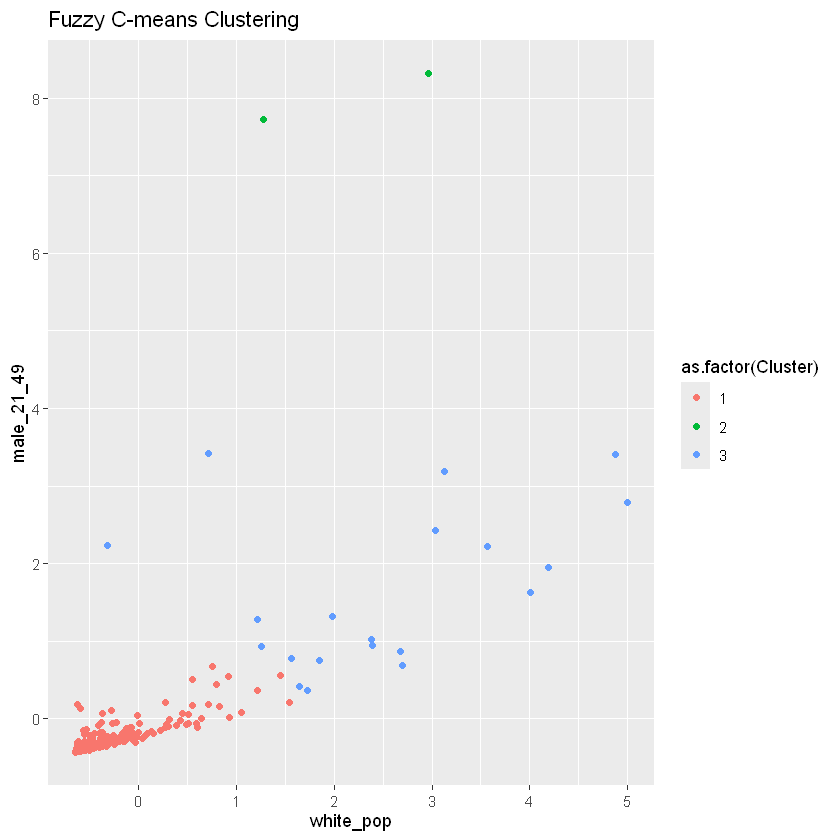

In [68]:

fuzzy_cluster_data <- fuzzy_cluster_data2
fuzzy_cluster <- fuzzy_cluster2
fuzzy_membership_matrix <- fuzzy_membership_matrix2

centers <- t(fuzzy_cluster$centers) 
fuzzy_cluster_data$Cluster <- apply(fuzzy_membership_matrix, 1, which.max) 
ggplot(fuzzy_cluster_data, aes(x = white_pop, y = male_21_49,  
                               color = as.factor(Cluster))) + 
  geom_point() + 
  labs(title = "Fuzzy C-means Clustering", x = "white_pop", y = "male_21_49")

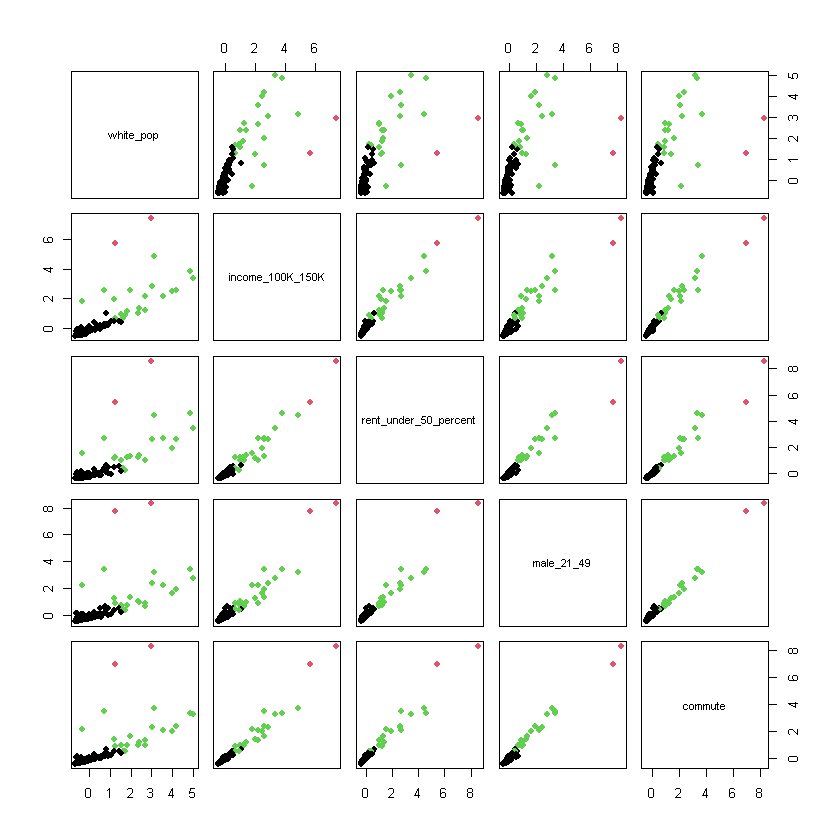

In [69]:
    pairs(dataset_select_clustering_scale, pch = 16, col = as.numeric(fuzzy_cluster$cluster))

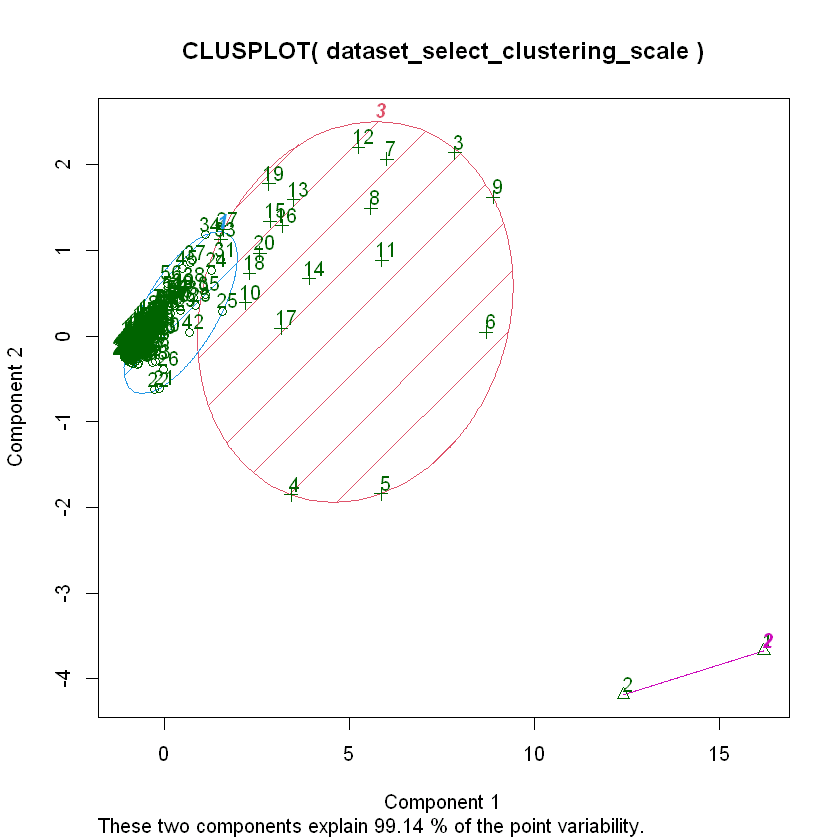

In [70]:
clusplot(dataset_select_clustering_scale, fuzzy_cluster$cluster, color = TRUE, shade = TRUE, 
         labels = 2, lines = 0)

From the above, We can see that most of the features used for the data set has fair amount of corelation

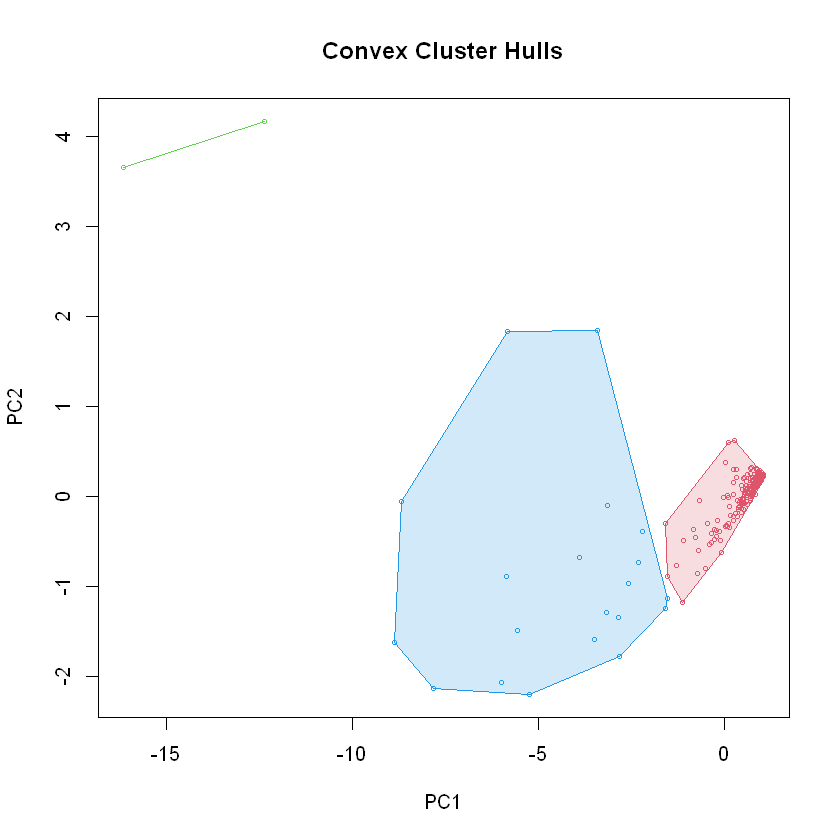

In [71]:
hullplot(dataset_select_clustering_scale, fuzzy_cluster$cluster)

In [72]:
dataset_select_clustering$cluster <- fuzzy_cluster$cluster
winner1<-dataset_select_clustering

In [73]:
dataset_select_clustering %>% group_by(cluster) %>% summarize(
  avg_death_per_case = mean(death_per_case),
    avg_male_21_49 = mean(male_21_49),
    no_counties_in_cluster=n())

cluster,avg_death_per_case,avg_male_21_49,no_counties_in_cluster
<int>,<dbl>,<dbl>,<int>
1,0.02705828,3525.195,200
2,0.02689154,161828.000,2
3,0.01844407,39467.650,20


### Cluster 2

In [74]:
dataset_select_clustering_scale <-dataset_select_clustering_scale2
summary(dataset_select_clustering_scale)

  hispanic_pop     income_50K_100K     female_21_49      worked_at_home    
 Min.   :-0.2510   Min.   :-0.48025   Min.   :-0.40366   Min.   :-0.40128  
 1st Qu.:-0.2321   1st Qu.:-0.42067   1st Qu.:-0.35719   1st Qu.:-0.35535  
 Median :-0.2031   Median :-0.31755   Median :-0.29011   Median :-0.27388  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.:-0.1235   3rd Qu.:-0.06348   3rd Qu.:-0.09495   3rd Qu.:-0.05596  
 Max.   : 9.7590   Max.   : 8.07375   Max.   : 8.17512   Max.   : 9.67399  

In [75]:
set.seed(123) 
n_cluster <- 5 
m <- 2 
fuzzy_cluster1 <- cmeans(dataset_select_clustering_scale, centers = 5, m = m)
fuzzy_cluster2 <- cmeans(dataset_select_clustering_scale, centers = 3, m = m)
fuzzy_cluster3 <- cmeans(dataset_select_clustering_scale, centers = 7, m = m)
fuzzy_cluster4 <- cmeans(dataset_select_clustering_scale, centers = 9, m = m)

In [76]:
# Data Membership Degree Matrix 
fuzzy_membership_matrix1 <- fuzzy_cluster1$membership 
fuzzy_membership_matrix2 <- fuzzy_cluster2$membership 
fuzzy_membership_matrix3 <- fuzzy_cluster3$membership 
fuzzy_membership_matrix4 <- fuzzy_cluster4$membership 
  

In [77]:
# Cluster Prototype Evolution Matrices 
initial_centers1 <- fuzzy_cluster1$centers 
final_centers1 <- t(fuzzy_cluster1$centers)

initial_centers2 <- fuzzy_cluster2$centers 
final_centers2 <- t(fuzzy_cluster2$centers)

initial_centers3 <- fuzzy_cluster3$centers 
final_centers3 <- t(fuzzy_cluster3$centers)

initial_centers4 <- fuzzy_cluster4$centers 
final_centers4 <- t(fuzzy_cluster4$centers)

cluster_membership1 <- as.data.frame(fuzzy_cluster1$membership) 
cluster_membership2 <- as.data.frame(fuzzy_cluster2$membership) 
cluster_membership3 <- as.data.frame(fuzzy_cluster3$membership) 
cluster_membership4 <- as.data.frame(fuzzy_cluster4$membership) 

fuzzy_cluster_data1 <- cbind(dataset_select_clustering_scale, cluster_membership1) 
fuzzy_cluster_data2 <- cbind(dataset_select_clustering_scale, cluster_membership2) 
fuzzy_cluster_data3 <- cbind(dataset_select_clustering_scale, cluster_membership3) 
fuzzy_cluster_data4 <- cbind(dataset_select_clustering_scale, cluster_membership4) 

head(fuzzy_cluster_data1)

,hispanic_pop,income_50K_100K,female_21_49,worked_at_home,1,2,3,4,5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.660063,8.073754,8.175117,7.768368,0.009383979,0.006608704,0.01597332,0.960806179,0.007227819
2,9.759021,6.338627,8.065484,9.673992,0.008272996,0.006027075,0.01307199,0.966088498,0.006539440
3,1.083512,3.277058,2.725398,2.030037,0.185618434,0.040044983,0.71164855,0.007630546,0.055057482
4,3.092729,1.636767,2.346927,1.402428,0.282612986,0.098742591,0.47285150,0.015812209,0.129980719
5,4.622239,3.096164,3.648852,2.048811,0.145281225,0.069430720,0.66340592,0.038334881,0.083547256
6,2.681424,4.056543,3.209328,2.103794,0.029206558,0.010370069,0.94329365,0.003968798,0.013160927


In [78]:
db_index <- davies_bouldin_index(fuzzy_cluster_data1, fuzzy_cluster1$centers, fuzzy_membership_matrix1) 
print(paste("Davies-Bouldin Index 1:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data2, fuzzy_cluster2$centers, fuzzy_membership_matrix2) 
print(paste("Davies-Bouldin Index 2:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data3, fuzzy_cluster3$centers, fuzzy_membership_matrix3) 
print(paste("Davies-Bouldin Index 3:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data4, fuzzy_cluster4$centers, fuzzy_membership_matrix4) 
print(paste("Davies-Bouldin Index 4:", db_index))


Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"


[1] "Davies-Bouldin Index 1: 0.698357819262781"
[1] "Davies-Bouldin Index 2: 0.601713255833001"


Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i,

[1] "Davies-Bouldin Index 3: 0.778706202869979"


Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i,

[1] "Davies-Bouldin Index 4: 1.17427221861615"


In [79]:
fuzzy_cluster_data <- fuzzy_cluster_data2
fuzzy_cluster <- fuzzy_cluster2
fuzzy_membership_matrix <- fuzzy_membership_matrix2

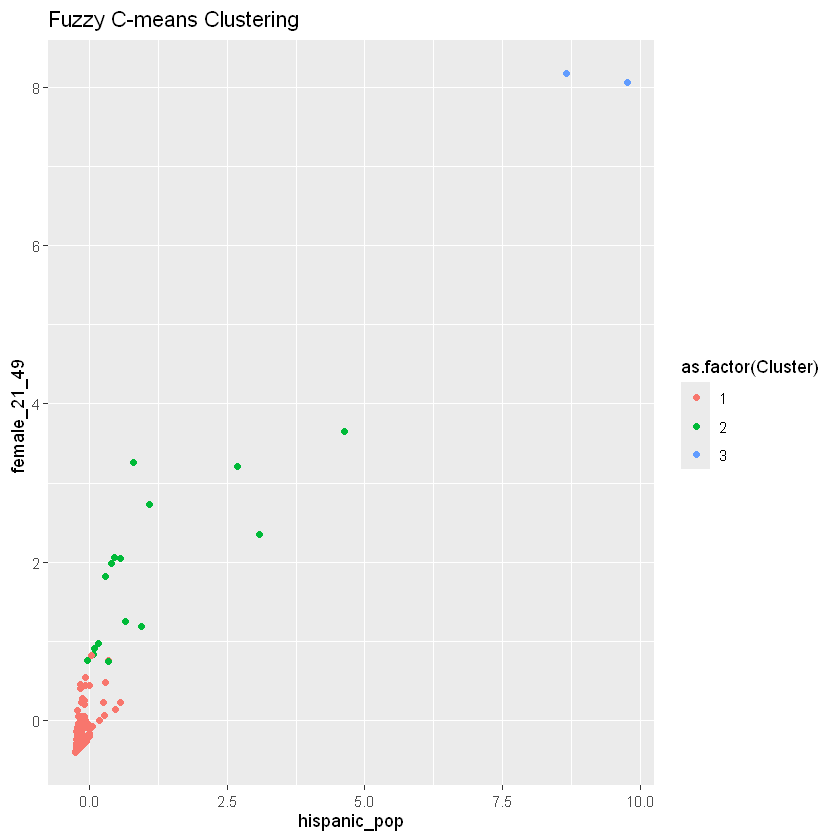

In [80]:
centers <- t(fuzzy_cluster$centers) 
fuzzy_cluster_data$Cluster <- apply(fuzzy_membership_matrix, 1, which.max) 
ggplot(fuzzy_cluster_data, aes(x = hispanic_pop, y = female_21_49,  
                               color = as.factor(Cluster))) + 
  geom_point() + 
  labs(title = "Fuzzy C-means Clustering", x = "hispanic_pop", y = "female_21_49 ")

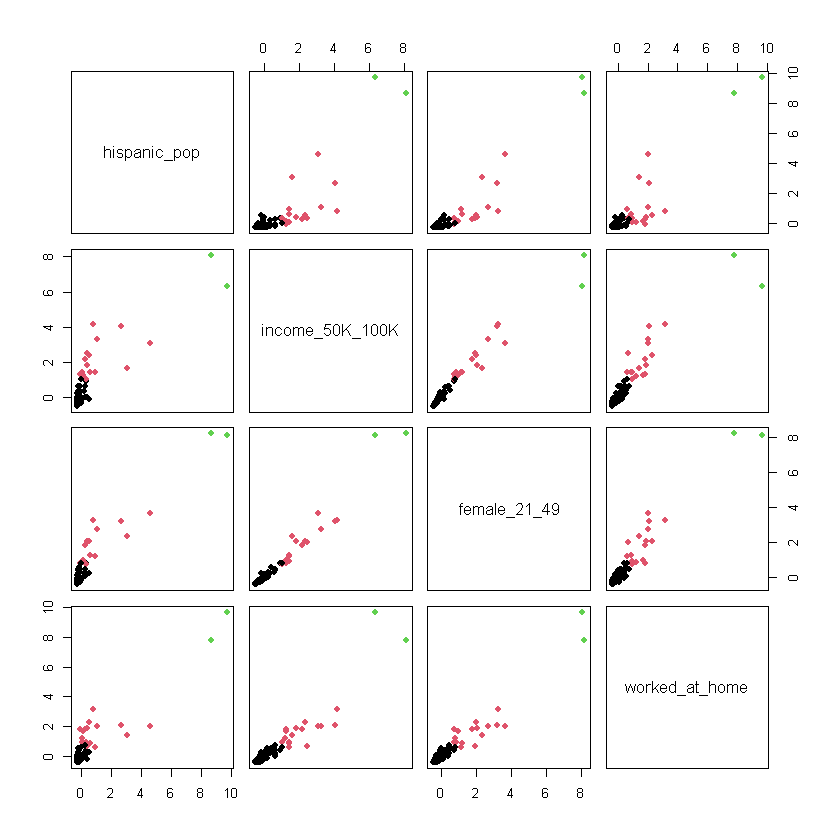

In [81]:
pairs(dataset_select_clustering_scale, pch = 16, col = as.numeric(fuzzy_cluster$cluster))


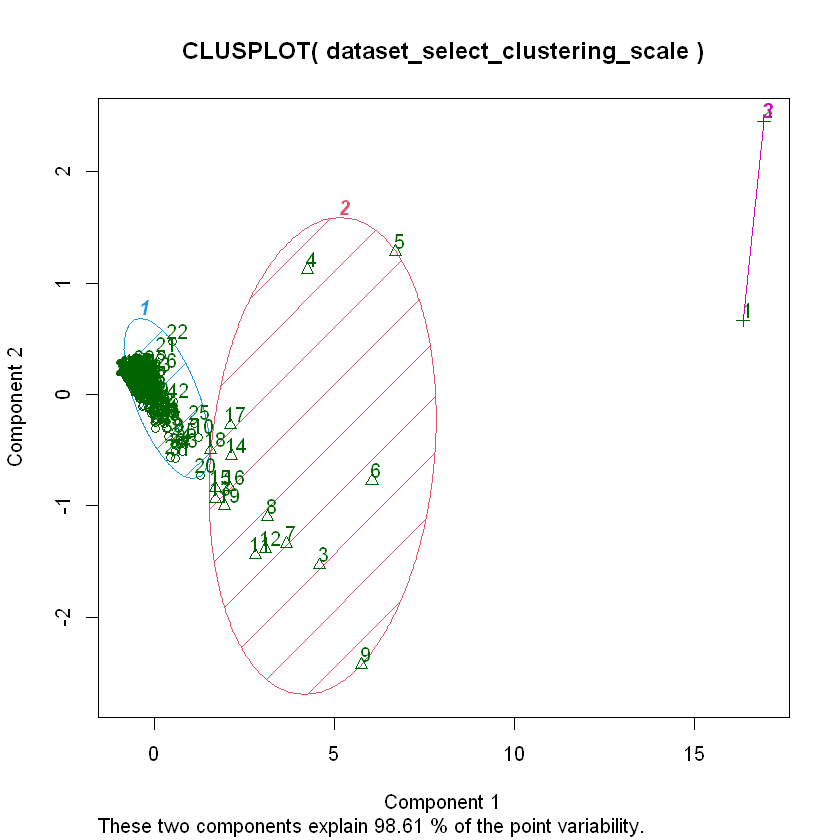

In [82]:

clusplot(dataset_select_clustering_scale, fuzzy_cluster$cluster, color = TRUE, shade = TRUE, 
         labels = 2, lines = 0)

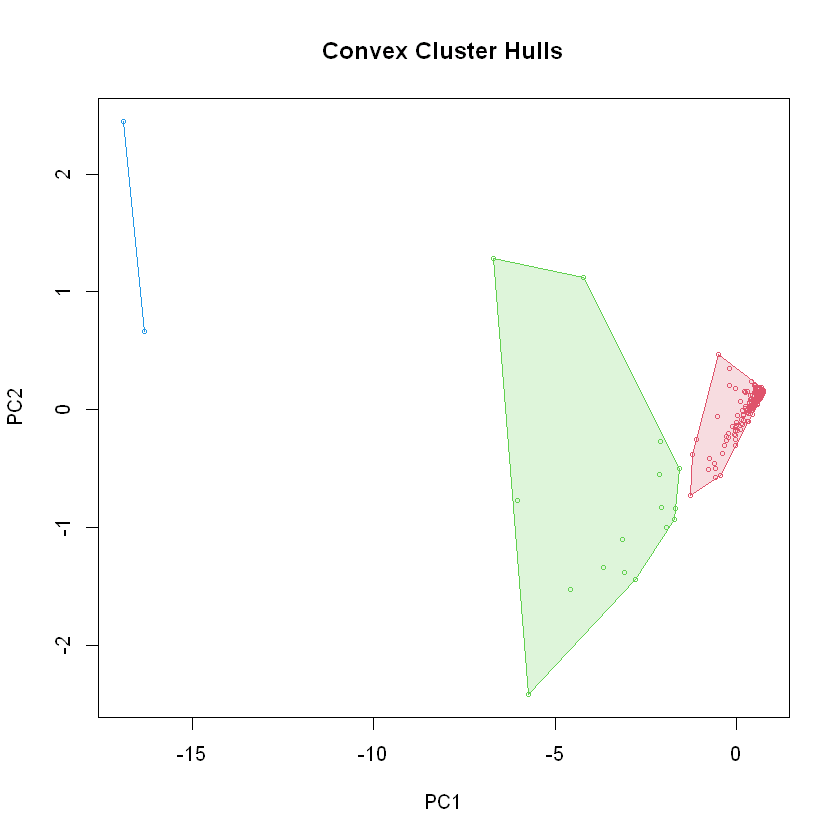

In [83]:
hullplot(dataset_select_clustering_scale, fuzzy_cluster$cluster)

In [84]:
dataset_select_clustering$cluster <- fuzzy_cluster$cluster

winner2<-dataset_select_clustering

dataset_select_clustering %>% group_by(cluster) %>% summarize(
  avg_death_per_case = mean(death_per_case),
    avg_hispanic_pop= mean(hispanic_pop),
    avg_female_21_49=mean(female_21_49),
     no_counties_in_cluster=n())

cluster,avg_death_per_case,avg_hispanic_pop,avg_female_21_49,no_counties_in_cluster
<int>,<dbl>,<dbl>,<dbl>,<int>
1,0.02692633,6276.77,3425.74,204
2,0.01797299,97230.31,43345.25,16
3,0.02689154,728483.50,163360.50,2


### CLuster 3

In [85]:
dataset_select_clustering_scale <-dataset_select_clustering_scale3
summary(dataset_select_clustering_scale)

 income_100K_150K   rent_under_50_percent male_50_above          commute       
 Min.   :-0.49239   Min.   :-0.4068       Min.   :-0.524613   Min.   :-0.4412  
 1st Qu.:-0.43887   1st Qu.:-0.3720       1st Qu.:-0.440329   1st Qu.:-0.3834  
 Median :-0.34345   Median :-0.3069       Median :-0.306636   Median :-0.3081  
 Mean   : 0.00000   Mean   : 0.0000       Mean   : 0.000000   Mean   : 0.0000  
 3rd Qu.:-0.07254   3rd Qu.:-0.1408       3rd Qu.:-0.000192   3rd Qu.:-0.0800  
 Max.   : 7.37936   Max.   : 8.5854       Max.   : 7.969696   Max.   : 8.2967  

In [86]:
set.seed(123) 
n_cluster <- 5 
m <- 2 
fuzzy_cluster1 <- cmeans(dataset_select_clustering_scale, centers = 5, m = m)
fuzzy_cluster2 <- cmeans(dataset_select_clustering_scale, centers = 3, m = m)
fuzzy_cluster3 <- cmeans(dataset_select_clustering_scale, centers = 7, m = m)
fuzzy_cluster4 <- cmeans(dataset_select_clustering_scale, centers = 9, m = m)

In [87]:
# Data Membership Degree Matrix 
fuzzy_membership_matrix1 <- fuzzy_cluster1$membership 
fuzzy_membership_matrix2 <- fuzzy_cluster2$membership 
fuzzy_membership_matrix3 <- fuzzy_cluster3$membership 
fuzzy_membership_matrix4 <- fuzzy_cluster4$membership 

In [88]:
# Cluster Prototype Evolution Matrices 
initial_centers1 <- fuzzy_cluster1$centers 
final_centers1 <- t(fuzzy_cluster1$centers)

initial_centers2 <- fuzzy_cluster2$centers 
final_centers2 <- t(fuzzy_cluster2$centers)

initial_centers3 <- fuzzy_cluster3$centers 
final_centers3 <- t(fuzzy_cluster3$centers)

initial_centers4 <- fuzzy_cluster4$centers 
final_centers4 <- t(fuzzy_cluster4$centers)

cluster_membership1 <- as.data.frame(fuzzy_cluster1$membership) 
cluster_membership2 <- as.data.frame(fuzzy_cluster2$membership) 
cluster_membership3 <- as.data.frame(fuzzy_cluster3$membership) 
cluster_membership4 <- as.data.frame(fuzzy_cluster4$membership) 

fuzzy_cluster_data1 <- cbind(dataset_select_clustering_scale, cluster_membership1) 
fuzzy_cluster_data2 <- cbind(dataset_select_clustering_scale, cluster_membership2) 
fuzzy_cluster_data3 <- cbind(dataset_select_clustering_scale, cluster_membership3) 
fuzzy_cluster_data4 <- cbind(dataset_select_clustering_scale, cluster_membership4) 

head(fuzzy_cluster_data1)

,income_100K_150K,rent_under_50_percent,male_50_above,commute,1,2,3,4,5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.379360,8.585387,7.969696,8.296710,0.011367254,0.01024474,0.01568615,0.932918652,0.02978320
2,5.693880,5.438001,7.063784,6.974905,0.024335804,0.02129370,0.03682869,0.828685051,0.08885675
3,3.343135,3.431992,2.661676,3.211183,0.003803802,0.00294918,0.01008608,0.002151353,0.98100959
4,1.795505,1.536212,1.710948,2.128970,0.081509287,0.05252204,0.72843789,0.008220008,0.12931078
5,2.581921,2.661243,3.865434,3.431921,0.039120082,0.03015021,0.09686898,0.022124126,0.81173661
6,4.846130,4.414474,3.954835,3.717860,0.052679122,0.04336076,0.10375155,0.093911156,0.70629741


In [89]:
db_index <- davies_bouldin_index(fuzzy_cluster_data1, fuzzy_cluster1$centers, fuzzy_membership_matrix1) 
print(paste("Davies-Bouldin Index 1:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data2, fuzzy_cluster2$centers, fuzzy_membership_matrix2) 
print(paste("Davies-Bouldin Index 2:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data3, fuzzy_cluster3$centers, fuzzy_membership_matrix3) 
print(paste("Davies-Bouldin Index 3:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data4, fuzzy_cluster4$centers, fuzzy_membership_matrix4) 
print(paste("Davies-Bouldin Index 4:", db_index))

Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"


[1] "Davies-Bouldin Index 1: 0.739791885493779"
[1] "Davies-Bouldin Index 2: 0.689610898672008"


Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i,

[1] "Davies-Bouldin Index 3: 0.917229768702394"


Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i,

[1] "Davies-Bouldin Index 4: 0.861722305390436"


In [90]:
fuzzy_cluster_data <- fuzzy_cluster_data2
fuzzy_cluster <- fuzzy_cluster2
fuzzy_membership_matrix <- fuzzy_membership_matrix2

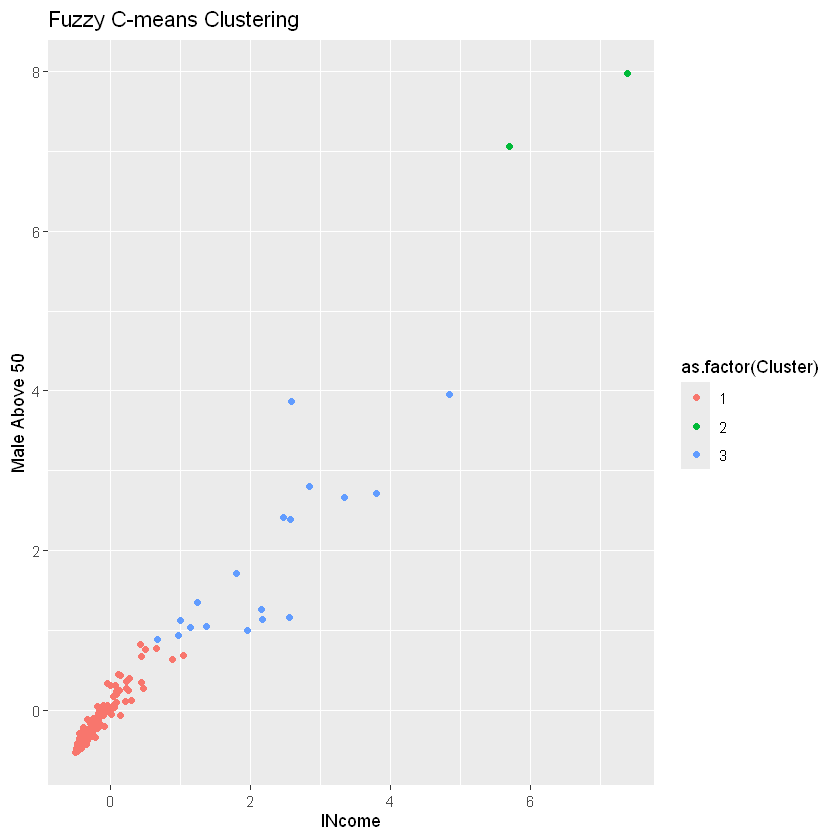

In [91]:
centers <- t(fuzzy_cluster$centers) 
fuzzy_cluster_data$Cluster <- apply(fuzzy_membership_matrix, 1, which.max) 
ggplot(fuzzy_cluster_data, aes(x = income_100K_150K, y = male_50_above,  
                               color = as.factor(Cluster))) + 
  geom_point() + 
  labs(title = "Fuzzy C-means Clustering", x = "INcome", y = "Male Above 50")

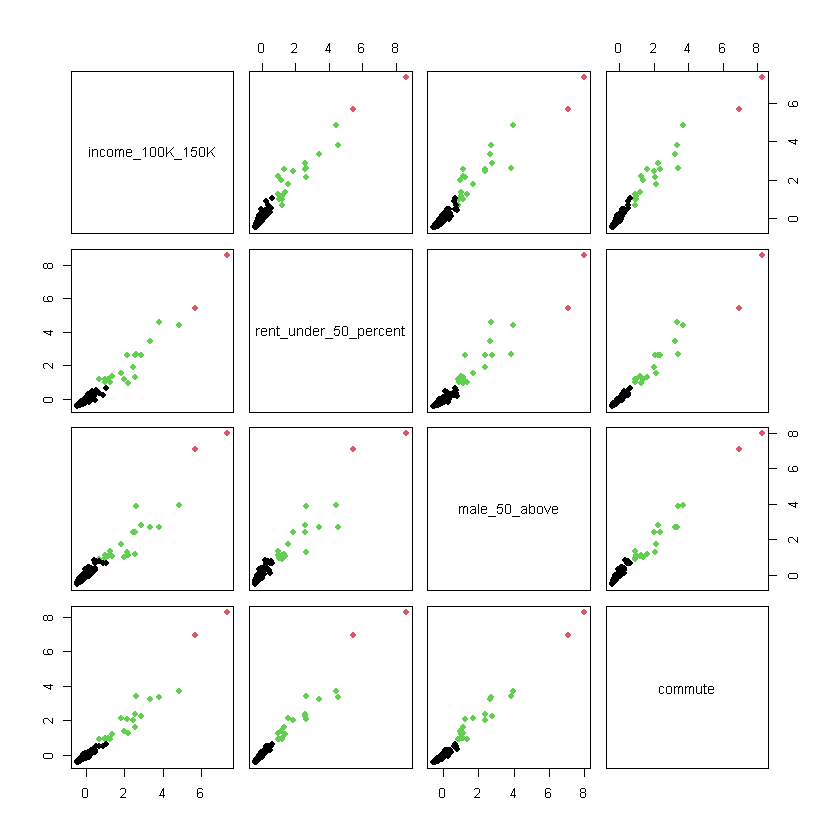

In [92]:
pairs(dataset_select_clustering_scale, pch = 16, col = as.numeric(fuzzy_cluster$cluster))

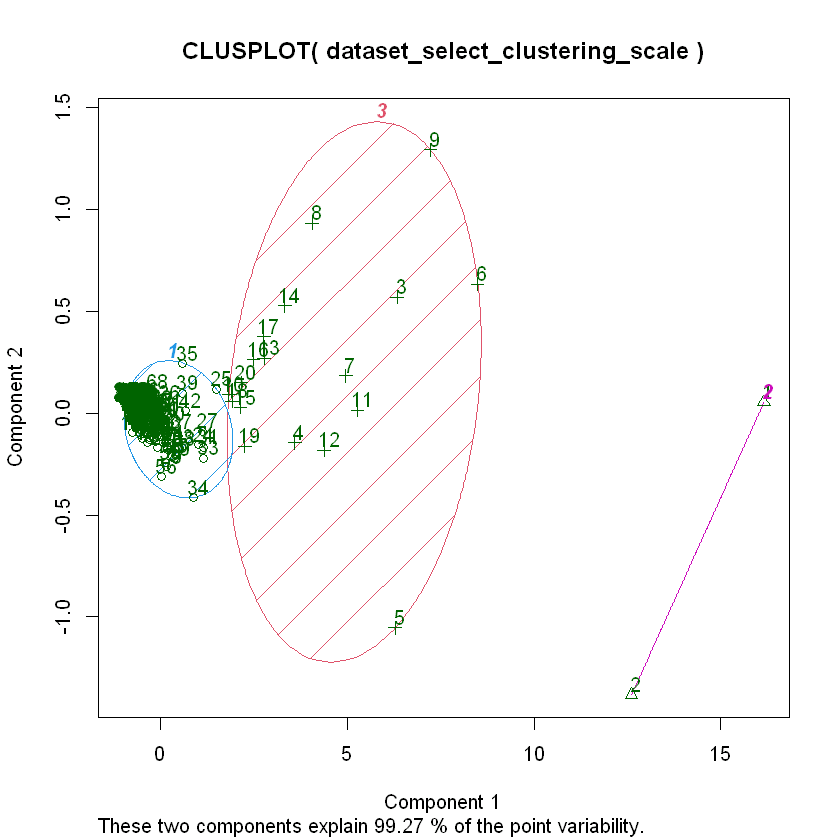

In [93]:
clusplot(dataset_select_clustering_scale, fuzzy_cluster$cluster, color = TRUE, shade = TRUE, 
         labels = 2, lines = 0)

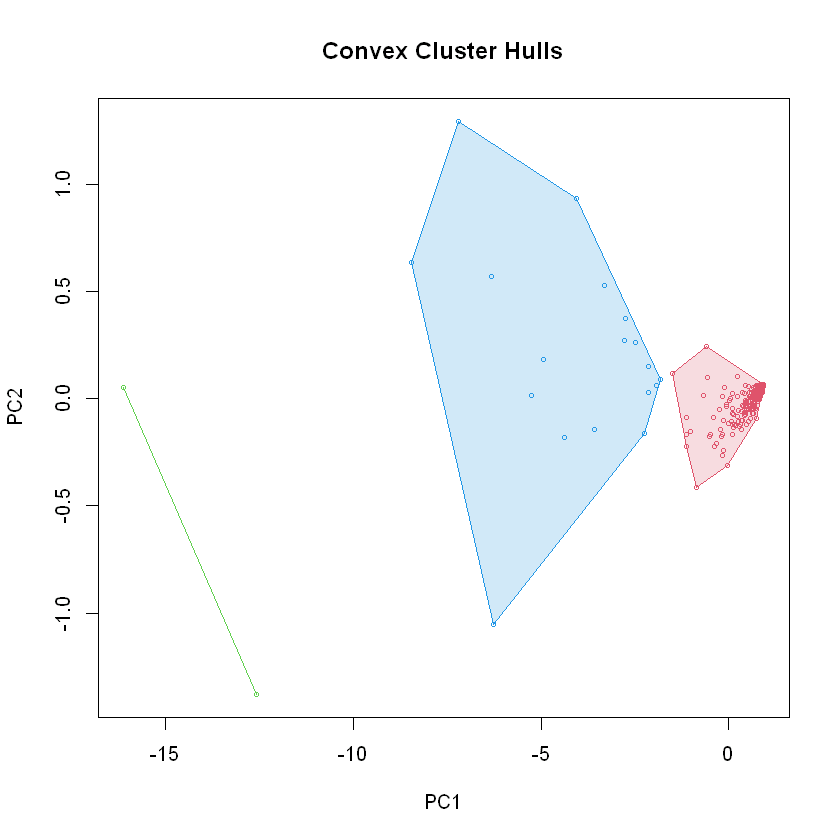

In [94]:
hullplot(dataset_select_clustering_scale, fuzzy_cluster$cluster)

In [95]:
dataset_select_clustering$cluster <- fuzzy_cluster$cluster
winner3 <- dataset_select_clustering

dataset_select_clustering %>% group_by(cluster) %>% summarize(
  avg_death_per_case = mean(death_per_case),
    avg_male_50_above = mean(male_50_above),
    no_counties_in_cluster=n())

cluster,avg_death_per_case,avg_male_50_above,no_counties_in_cluster
<int>,<dbl>,<dbl>,<int>
1,0.02696971,3688.322,202
2,0.02689154,103378.500,2
3,0.01848090,30637.056,18


### Cluster 4

In [96]:
dataset_select_clustering_scale <-dataset_select_clustering_scale4
summary(dataset_select_clustering_scale)

  hispanic_pop     income_50K_100K      male_21_49          commute       
 Min.   :-0.2510   Min.   :-0.48025   Min.   :-0.42670   Min.   :-0.4412  
 1st Qu.:-0.2321   1st Qu.:-0.42067   1st Qu.:-0.37657   1st Qu.:-0.3834  
 Median :-0.2031   Median :-0.31755   Median :-0.29161   Median :-0.3081  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.:-0.1235   3rd Qu.:-0.06348   3rd Qu.:-0.09854   3rd Qu.:-0.0800  
 Max.   : 9.7590   Max.   : 8.07375   Max.   : 8.31051   Max.   : 8.2967  
 rent_over_50_percent
 Min.   :-0.3775     
 1st Qu.:-0.3553     
 Median :-0.3095     
 Mean   : 0.0000     
 3rd Qu.:-0.1573     
 Max.   : 6.8913     

In [97]:
set.seed(123) 
n_cluster <- 5 
m <- 2 
fuzzy_cluster1 <- cmeans(dataset_select_clustering_scale, centers = 5, m = m)
fuzzy_cluster2 <- cmeans(dataset_select_clustering_scale, centers = 3, m = m)
fuzzy_cluster3 <- cmeans(dataset_select_clustering_scale, centers = 7, m = m)
fuzzy_cluster4 <- cmeans(dataset_select_clustering_scale, centers = 9, m = m)

In [98]:

# Data Membership Degree Matrix 
fuzzy_membership_matrix1 <- fuzzy_cluster1$membership 
fuzzy_membership_matrix2 <- fuzzy_cluster2$membership 
fuzzy_membership_matrix3 <- fuzzy_cluster3$membership 
fuzzy_membership_matrix4 <- fuzzy_cluster4$membership 
  

In [99]:
# Cluster Prototype Evolution Matrices 
initial_centers1 <- fuzzy_cluster1$centers 
final_centers1 <- t(fuzzy_cluster1$centers)

initial_centers2 <- fuzzy_cluster2$centers 
final_centers2 <- t(fuzzy_cluster2$centers)

initial_centers3 <- fuzzy_cluster3$centers 
final_centers3 <- t(fuzzy_cluster3$centers)

initial_centers4 <- fuzzy_cluster4$centers 
final_centers4 <- t(fuzzy_cluster4$centers)

cluster_membership1 <- as.data.frame(fuzzy_cluster1$membership) 
cluster_membership2 <- as.data.frame(fuzzy_cluster2$membership) 
cluster_membership3 <- as.data.frame(fuzzy_cluster3$membership) 
cluster_membership4 <- as.data.frame(fuzzy_cluster4$membership) 

fuzzy_cluster_data1 <- cbind(dataset_select_clustering_scale, cluster_membership1) 
fuzzy_cluster_data2 <- cbind(dataset_select_clustering_scale, cluster_membership2) 
fuzzy_cluster_data3 <- cbind(dataset_select_clustering_scale, cluster_membership3) 
fuzzy_cluster_data4 <- cbind(dataset_select_clustering_scale, cluster_membership4) 

head(fuzzy_cluster_data1)

,hispanic_pop,income_50K_100K,male_21_49,commute,rent_over_50_percent,1,2,3,4,5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.660063,8.073754,8.310508,8.296710,6.891311,0.004956708,0.004561457,0.006306465,0.972809266,0.01136610
2,9.759021,6.338627,7.719448,6.974905,6.514913,0.005405325,0.004970625,0.006883826,0.970259258,0.01248097
3,1.083512,3.277058,2.789336,3.211183,4.478906,0.020097942,0.016286282,0.041450469,0.007413267,0.91475204
4,3.092729,1.636767,2.235001,2.128970,2.028639,0.138041448,0.106334464,0.313666841,0.022968602,0.41898865
5,4.622239,3.096164,3.414305,3.431921,3.223631,0.091145538,0.076625982,0.155663326,0.066084242,0.61048091
6,2.681424,4.056543,3.190818,3.717860,3.902913,0.033690754,0.027823478,0.063468415,0.021108875,0.85390848


In [100]:
db_index <- davies_bouldin_index(fuzzy_cluster_data1, fuzzy_cluster1$centers, fuzzy_membership_matrix1) 
print(paste("Davies-Bouldin Index 1:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data2, fuzzy_cluster2$centers, fuzzy_membership_matrix2) 
print(paste("Davies-Bouldin Index 2:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data3, fuzzy_cluster3$centers, fuzzy_membership_matrix3) 
print(paste("Davies-Bouldin Index 3:", db_index))
db_index <- davies_bouldin_index(fuzzy_cluster_data4, fuzzy_cluster4$centers, fuzzy_membership_matrix4) 
print(paste("Davies-Bouldin Index 4:", db_index))

Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"


[1] "Davies-Bouldin Index 1: 0.670131737347825"
[1] "Davies-Bouldin Index 2: 0.645257336991538"


Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i,

[1] "Davies-Bouldin Index 3: 0.78578029993446"


Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i, ])^2)) * membership_matrix[i, :
"longer object length is not a multiple of shorter object length"
Warning message in sqrt(rowSums((data - cluster_centers[i,

[1] "Davies-Bouldin Index 4: 1.24486487889565"


In [101]:
fuzzy_cluster_data <- fuzzy_cluster_data2
fuzzy_cluster <- fuzzy_cluster2
fuzzy_membership_matrix <- fuzzy_membership_matrix2

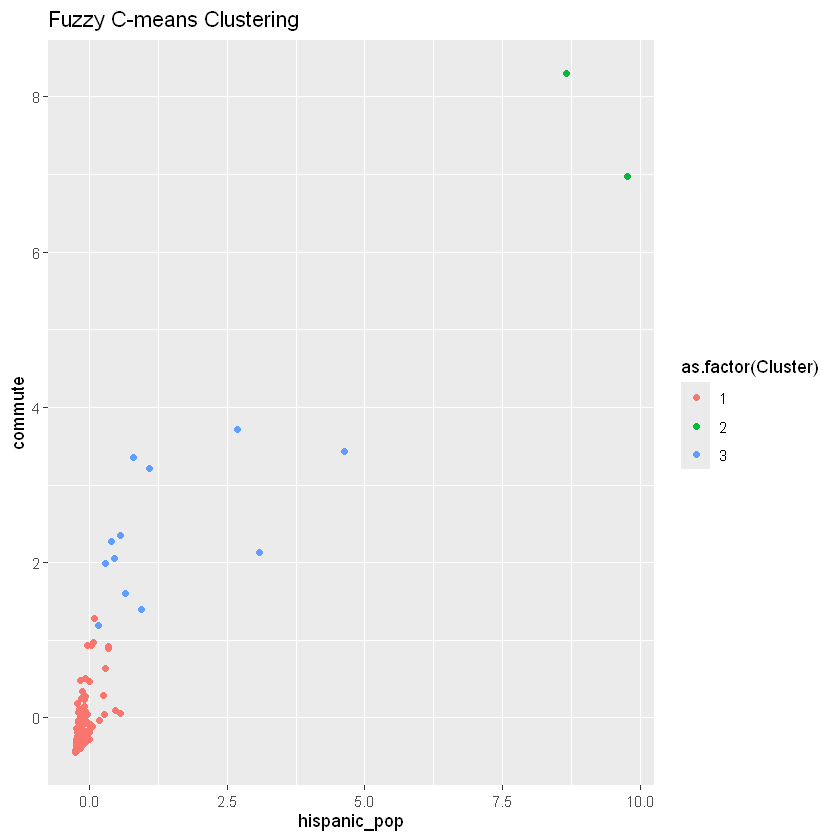

In [102]:
centers <- t(fuzzy_cluster$centers) 
fuzzy_cluster_data$Cluster <- apply(fuzzy_membership_matrix, 1, which.max) 
ggplot(fuzzy_cluster_data, aes(x = hispanic_pop, y = commute,  
                               color = as.factor(Cluster))) + 
  geom_point() + 
  labs(title = "Fuzzy C-means Clustering", x = "hispanic_pop", y = "commute")

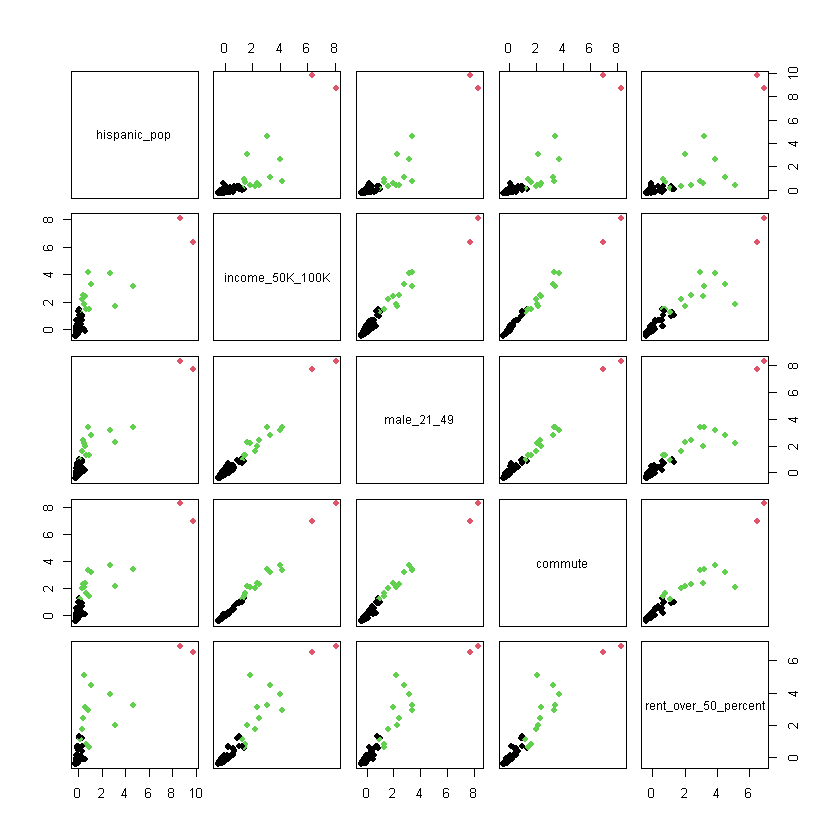

In [103]:
pairs(dataset_select_clustering_scale, pch = 16, col = as.numeric(fuzzy_cluster$cluster))

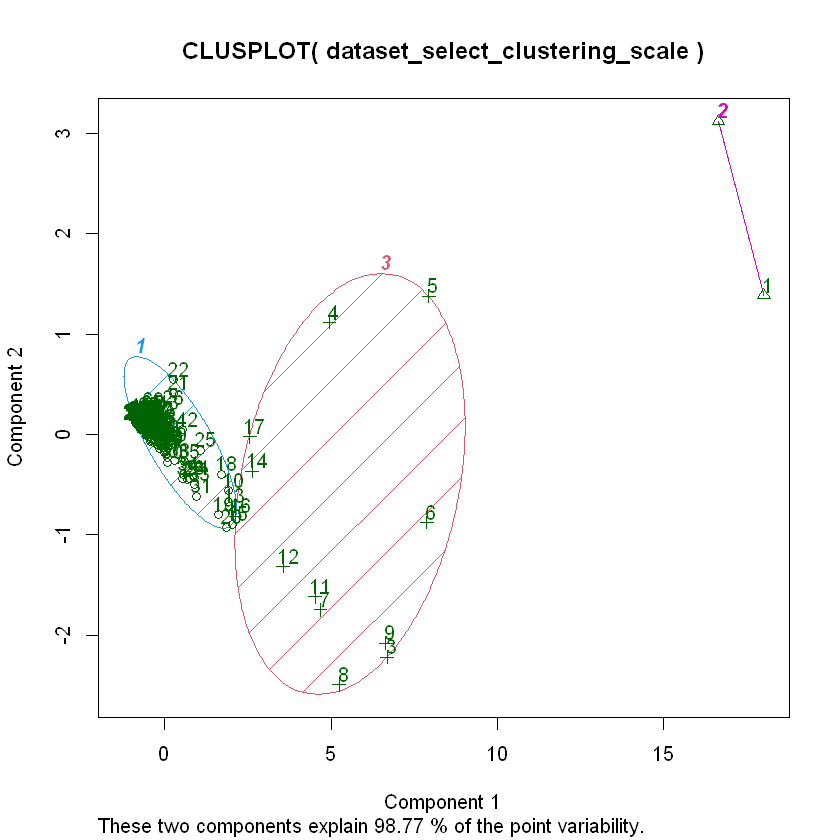

In [104]:
clusplot(dataset_select_clustering_scale, fuzzy_cluster$cluster, color = TRUE, shade = TRUE, 
         labels = 2, lines = 0)

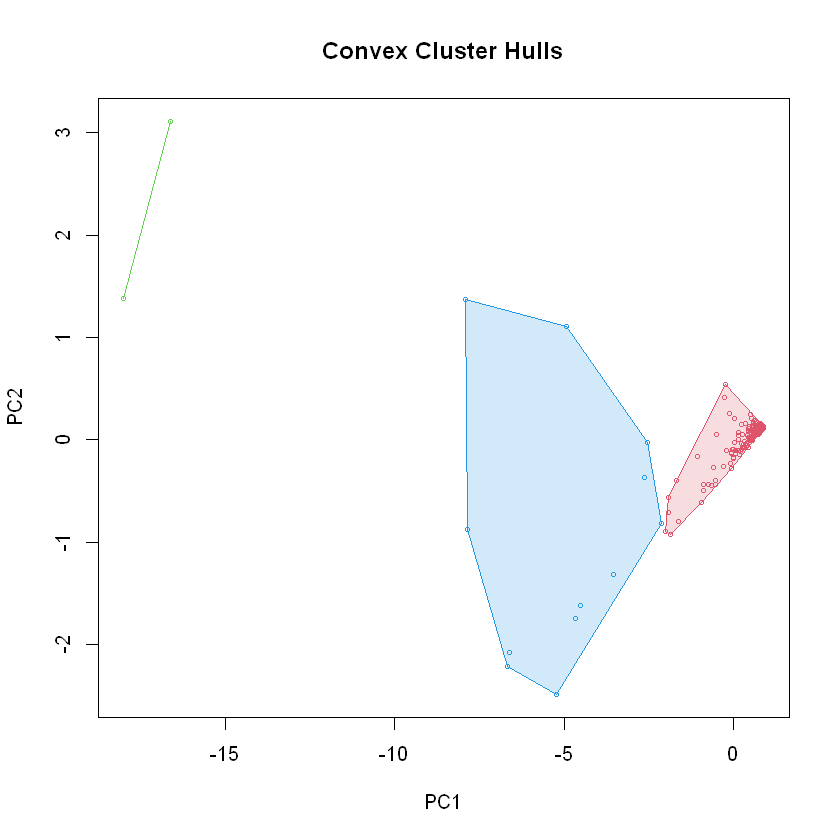

In [105]:
hullplot(dataset_select_clustering_scale, fuzzy_cluster$cluster)

In [106]:
dataset_select_clustering$cluster <- fuzzy_cluster$cluster
winner4 <-dataset_select_clustering
dataset_select_clustering %>% group_by(cluster) %>% summarize(
  avg_death_per_case = mean(death_per_case),
    avg_hispanic_pop = mean(hispanic_pop),
    avg_wcommute=mean(commute),
    no_counties_in_cluster=n())

cluster,avg_death_per_case,avg_hispanic_pop,avg_wcommute,no_counties_in_cluster
<int>,<dbl>,<dbl>,<dbl>,<int>
1,0.02677389,6695.212,17090.73,208
2,0.02689154,728483.500,598511.00,2
3,0.01763085,120295.167,209958.25,12


## Supervised Cluster evaluation

### Creating the ground truth

We are creating the ground truth by dividing the death percentage to 7 groups based on the descending order of the confirmed cases

In [107]:
ground_truth1 <- ntile(dataset_select_clustering$death_per_case, 3)
ground_truth2 <- ntile(dataset_select_clustering$death_per_case, 3)
ground_truth3 <- ntile(dataset_select_clustering$death_per_case, 3)
ground_truth4 <- ntile(dataset_select_clustering$death_per_case, 3)


### Purity evaluation based on the ground truth

In [108]:
purity(winner1$cluster,ground_truth1)
purity(winner2$cluster,ground_truth2)
purity(winner3$cluster,ground_truth3)
purity(winner4$cluster,ground_truth4)

,ClassLabels,ClusterLabels,ClusterSize
,<chr>,<chr>,<dbl>
1,1,3,72
2,3,1,13


,ClassLabels,ClusterLabels,ClusterSize
,<chr>,<chr>,<dbl>
1,1,3,72
2,2,1,11


,ClassLabels,ClusterLabels,ClusterSize
,<chr>,<chr>,<dbl>
1,1,3,72
2,3,1,12


,ClassLabels,ClusterLabels,ClusterSize
,<chr>,<chr>,<dbl>
1,1,3,72
2,3,1,8


# References

https://www.statology.org/hierarchical-clustering-in-r/ <br>
https://www.geeksforgeeks.org/fuzzy-clustering-in-r/  <br>
https://uc-r.github.io/hc_clustering  <br>
https://www.geeksforgeeks.org/dbscan-clustering-in-r-programming/ <br>
https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/
